# **LABORATORIO 2**
---
En este notebook se hace un análisis de datos para la empresa MotorAlpes, que nos ha pedido ayuda con las siguientes tareas:
* Identificar las variables que más impactan el precio de un vehículo usado.
* Predecir el precio de un vehículo usado a partir de las variables de mayor interés.

Para esto nos fue dado un conjunto de datos que reúne información general de todo tipo de vehículos usados junto a los precios que se consideran apropiados.
## **1. Entendimiento de los datos**
Primero se va a revisar el conjunto de datos para ver si hay suficientes entradas para utilizar los algoritmos de agrupamiento con los cuales se buscará solucionar el problema. Una vez se demuestre que se tienen los datos suficientes se buscará entender los diferentes valores que hay para las distintas columnas.
### **1.1 Carga de datos**
Para la carga y manipulación de datos se utiliza la libreria **Pandas** (https://pandas.pydata.org/) y para la visualización **Matplotlib** (https://matplotlib.org/) y **Seaborn** (https://seaborn.pydata.org/). Primero se realiza la instalación de las librerias necesarias.

In [1]:
!pip install category_encoders
!pip install ydata-profiling

     ---------------------------------------- 81.2/81.2 kB ? eta 0:00:00


Importamos las librerias que utilizaremos a lo largo del notebook.

In [61]:
import pandas as pd
import numpy as np

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

import ydata_profiling
import joblib

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

Cargamos el archivo de excel con el conjunto de datos en un DataFrame de Pandas

In [5]:
#df_cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/MotorAlpes_data.csv', sep=',', encoding = 'utf-8', index_col=0)
df_cars = pd.read_csv('../data/data.csv', sep=',', encoding = 'utf-8', index_col=0)

In [6]:
df_cars.shape

(7115, 11)

In [9]:
df_cars.sample(5)

year  km_driven         owner seller_type  seats    fuel transmission  \
3388  2009.0    17000.0   First Owner  Individual    5.0  Petrol       Manual   
3697  2010.0   120000.0   First Owner  Individual    5.0  Diesel       Manual   
6520  2016.0    80000.0  Second Owner  Individual    5.0  Petrol       Manual   
7281  2017.0    68140.0   First Owner      Dealer    5.0  Petrol    Automatic   
2346  2013.0    30000.0   First Owner  Individual    5.0  Petrol       Manual   

      mileage  engine  max_power  selling_price  
3388    19.70   796.0      46.30        1453.84  
3697    21.10  1248.0      73.90            NaN  
6520    20.51   998.0      67.04            NaN  
7281    18.00  1497.0     117.60       12418.22  
2346    18.50  1197.0      82.85        4361.52

Cargamos también el archivo de test.

In [11]:
#df_cars_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/MotorAlpes_test.csv', sep=',', encoding = 'utf-8', index_col=0)
df_cars_test = pd.read_csv('../data/data_test.csv', sep=',', encoding = 'utf-8', index_col=0)

In [12]:
df_cars_test.shape

(791, 10)

In [13]:
df_cars_test.sample(5)

year  km_driven         owner seller_type  seats    fuel transmission  \
5735  2014.0   120000.0   First Owner  Individual    5.0  Diesel       Manual   
679   2019.0    30000.0   Third Owner  Individual    5.0  Diesel       Manual   
6026  2014.0    90000.0  Second Owner  Individual    5.0  Diesel       Manual   
5611  2017.0    90000.0  Second Owner  Individual    7.0  Diesel       Manual   
1492  2015.0   115000.0  Second Owner  Individual    5.0  Diesel       Manual   

      mileage  engine  max_power  
5735    22.30  1248.0      74.00  
679     23.00  1498.0      98.96  
6026    24.00  1120.0      70.00  
5611    15.96  2523.0      62.10  
1492    26.59  1248.0      74.00

### **1.2 Descripción general del conjunto de datos**
A continuación se verá el tipo de dato de cada columna.

In [14]:
df_cars.dtypes

year             float64
km_driven        float64
owner             object
seller_type       object
seats            float64
fuel              object
transmission      object
mileage          float64
engine           float64
max_power        float64
selling_price    float64
dtype: object

### **1.3 Descripción de las columnas numéricas**


A continuación se muestran estadísticas relevantes para entender mejor las columnas con valores numéricos.

In [15]:
df_cars.describe()

year     km_driven        seats      mileage        engine  \
count  6876.000000  6.917000e+03  7115.000000  6917.000000   6835.000000   
mean   2013.980948  6.911118e+04     5.411103    19.523473   1835.489539   
std       3.852565  5.796521e+04     0.953555     4.241574   2363.919253   
min    1994.000000  1.000000e+00     2.000000     0.000000      4.000000   
25%    2012.000000  3.400000e+04     5.000000    16.800000   1197.000000   
50%    2015.000000  6.000000e+04     5.000000    19.330000   1248.000000   
75%    2017.000000  9.400000e+04     5.000000    22.320000   1597.000000   
max    2020.000000  2.360457e+06    14.000000    46.816000  19972.000000   

         max_power  selling_price  
count  6847.000000    6714.000000  
mean    141.981595   11261.208041  
std     274.956684   40765.694516  
min       1.070000       1.910000  
25%      68.050000    3210.560000  
50%      83.100000    5451.900000  
75%     104.680000    8480.740000  
max    1995.640000  598983.440000

### **1.4 Visualización de datos**
Usando el html que nos crea la librería ydata-profiling, se puede entender mucho mejor el conjunto de datos. Esta librería nos dice los distintos valores para cada columna, el número de valores nulos, y otras estadísticas de interés para las variables numéricas.

In [16]:
profile = ydata_profiling.ProfileReport(df_cars)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **2. Identificación de variables y limpieza de datos**
---
Tenemos 4 columnas categóricas y 7 numéricas de las cuales una de estas es la variable del precio del vehículo, la cual queremos predecir. Tener en cuenta que mileage hace referencia a la distancia que puede recorrer un vehículo con una determinada cantidad de combustible, esta medida esta dada en kilometros por litro de combustible, se hace esta aclaración puesto que con el nombre se podría confundir con km_driven que sí hace referencia al kilometraje o número de kilómetros recorridos por el vehículo. De las 4 variables categóricas tenemos:

* Variables nominales: fuel, transmission, seller_type
* Variables ordinales: owner

### **2.1 Tratamiento de datos nulos**
A continuación veremos el porcentage de valores nulos para cada columna. Estos valores serán borrados puesto que consideramos que realizar una imputación puede afectar la confiabilidad del modelo que creemos.


In [17]:
df_cars.isnull().sum()/df_cars.shape[0]

year             0.033591
km_driven        0.027829
owner            0.033591
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
selling_price    0.056360
dtype: float64

In [18]:
df_cars_test.isnull().sum()/df_cars_test.shape[0]

year            0.034134
km_driven       0.027813
owner           0.034134
seller_type     0.000000
seats           0.000000
fuel            0.000000
transmission    0.000000
mileage         0.027813
engine          0.035398
max_power       0.036662
dtype: float64

In [19]:
df_cars = df_cars.dropna()
df_cars_test = df_cars_test.dropna()

De 7115 filas que teniamos inicialmente en el conjunto de datos quedaron 6045 luego de remover las entradas con datos faltantes. En el conjunto de test bajó de 791 filas a 713.


In [20]:
df_cars.shape

(6045, 11)

In [21]:
df_cars_test.shape

(713, 10)

### **2.2 Tratamiento de entradas duplicadas**
También vamos a remover las entradas duplicadas en los datos. Esto se hace porque el hecho de tener entradas repetidas hace que el modelo de regresión lineal haga más énfasis en esos datos repetidos y sobreajuste el modelo hacia estos valores.

In [22]:
df_cars.drop_duplicates(inplace=True)
df_cars_test.drop_duplicates(inplace=True)

C:\Users\jm200\AppData\Local\Temp\ipykernel_7652\3610504806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars.drop_duplicates(inplace=True)


Ahora, de 6045 filas que teniamos en los datos luego de remover los valores nulos, pasamos a 5357 filas luego de eliminar filas repetidas. Hicimos lo mismo con el test y bajamos de 713 a 679 filas.

In [23]:
df_cars.shape

(5357, 11)

In [24]:
df_cars_test.shape

(679, 10)

### **2.3 Transformación de columnas categóricas**
A continuación vamos a convertir las columnas categóricas en numéricas, utilizando el encoder correspondiente para cada tipo de columna categórica. 


*   La columna 'owner', por ser de tipo categorica pero de tipo ordinal se transformó usando ordinal encoder. Este mismo se utilizó también para la columna 'transmission' ya que puede verse como un booleano, es o automática o manual. 
*   Las columnas 'seller type' y 'fuel' fueron transformadas usando target encoding ya que este no agrega dimensiones al conjunto de datos, además si estas variables tienen una relación con el precio este tipo de encoder permite capturar esa información y así lograr mejores predicciones. No obstante este tipo de encoder es propenso al overfitting, esto será tenido en cuenta más adelante para el mejoramiento del modelo de predicción.

(Borrar esto despues: si sale mucho overfitting cambiar target encoder por label encoder o tambien se puede probar con el one hot)

In [25]:
# Ordinal Encoder
oe_o = OrdinalEncoder(categories = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']])
df_cars[["owner"]] = oe_o.fit_transform(df_cars[["owner"]])

oe_o = OrdinalEncoder(categories = [['Manual', 'Automatic']])
df_cars[["transmission"]] = oe_o.fit_transform(df_cars[["transmission"]])
df_cars.sample(5)

C:\Users\jm200\AppData\Local\Temp\ipykernel_7652\3152270991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars[["owner"]] = oe_o.fit_transform(df_cars[["owner"]])
C:\Users\jm200\AppData\Local\Temp\ipykernel_7652\3152270991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars[["transmission"]] = oe_o.fit_transform(df_cars[["transmission"]])


year  km_driven  owner seller_type  seats    fuel  transmission  \
7605  2015.0    70000.0    1.0  Individual    7.0  Diesel           0.0   
7654  2018.0    25000.0    1.0  Individual    5.0  Petrol           0.0   
7171  2010.0    90000.0    1.0  Individual    5.0  Diesel           0.0   
1951  2015.0   160000.0    1.0  Individual    5.0  Diesel           0.0   
2185  2017.0    60000.0    1.0  Individual    7.0  Diesel           0.0   

      mileage   engine  max_power  selling_price  
7605    15.40   1997.0     120.00       10600.92  
7654    23.84  19908.0      84.00        6057.67  
7171    17.00   1405.0      70.00        1817.30  
1951    24.40   1120.0      71.01        4543.25  
2185    16.50   1493.0      70.00        8359.58

In [26]:
# Ordinal Encoder
oe_o = OrdinalEncoder(categories = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']])
df_cars_test[["owner"]] = oe_o.fit_transform(df_cars_test[["owner"]])

oe_o = OrdinalEncoder(categories = [['Manual', 'Automatic']])
df_cars_test[["transmission"]] = oe_o.fit_transform(df_cars_test[["transmission"]])
df_cars_test.sample(5)

year  km_driven  owner seller_type  seats    fuel  transmission  \
3263  2009.0    70000.0    3.0  Individual    5.0  Petrol           0.0   
1386  2015.0    30000.0    1.0      Dealer    5.0  Petrol           0.0   
4015  2012.0    70000.0    1.0  Individual    5.0  Petrol           0.0   
2240  2011.0   106000.0    2.0  Individual    5.0  Diesel           1.0   
476   2014.0    21000.0    1.0  Individual    7.0  Petrol           0.0   

      mileage  engine  max_power  
3263    19.70   796.0      46.30  
1386    18.60  1197.0      81.83  
4015    18.90   998.0      67.10  
2240    16.96  1968.0     138.10  
476     16.02  1373.0      93.70

A continuación se imprimen el número de ocurrencias de cada valor de las columnas categóricas para saber después qué valor corresponde a qué tipo de 'fuel' y de 'seller_type'.

In [27]:
df_cars['seller_type'].value_counts()

Individual          4742
Dealer               577
Trustmark Dealer      38
Name: seller_type, dtype: int64

In [28]:
df_cars['fuel'].value_counts()

Diesel    2926
Petrol    2366
CNG         37
LPG         28
Name: fuel, dtype: int64

In [29]:
# Target Encoder
cols = ['seller_type', 'fuel']
target = 'selling_price'
for col in cols:
  te = TargetEncoder()
  # Ajustar los datos
  te.fit(X= df_cars[col], y= df_cars[target])
  # Transformar
  df_cars[col] = te.transform(df_cars[col])

df_cars.sample(5)

C:\Users\jm200\AppData\Local\Temp\ipykernel_7652\1016755346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars[col] = te.transform(df_cars[col])
C:\Users\jm200\AppData\Local\Temp\ipykernel_7652\1016755346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cars[col] = te.transform(df_cars[col])


year  km_driven  owner  seller_type  seats          fuel  \
3793  2013.0   120000.0    1.0  9400.926008    5.0  11271.021056   
3370  2015.0    50000.0    1.0  9400.926008    5.0   9938.805638   
4309  2007.0   120000.0    3.0  9400.926008    5.0   9938.805638   
545   2015.0    60000.0    1.0  9400.926008    5.0   9938.805638   
734   2012.0   110000.0    2.0  9400.926008    9.0  11271.021056   

      transmission  mileage   engine  max_power  selling_price  
3793           0.0    23.59   1364.0      67.06        3937.48  
3370           0.0    18.60  11845.0      76.80        2423.07  
4309           0.0    15.00   1586.0    1822.54        1514.42  
545            0.0    22.74    796.0      47.30        2859.22  
734            0.0    15.96   2523.0    1911.17        4119.21

In [30]:
df_cars['seller_type'].unique()

array([ 9400.92600801, 17437.49974003, 60973.05640063])

In [31]:
df_cars['seller_type'].value_counts()

9400.926008     4742
17437.499740     577
60973.056401      38
Name: seller_type, dtype: int64

In [32]:
df_cars['fuel'].unique()

array([11271.02105605,  9938.80563821,  5077.79397814, 17823.25538647])

In [33]:
df_cars['fuel'].value_counts()

11271.021056    2926
9938.805638     2366
17823.255386      37
5077.793978       28
Name: fuel, dtype: int64

In [34]:
# Preprocessing convertir fuel y seller type de datos de prueba mapeandolos a los datos que se conocen

df_cars_test['seller_type'] = df_cars_test['seller_type'].map({'Individual':9400.92600801, 'Dealer':17437.49974003, 'Trustmark Dealer':60973.05640063})
df_cars_test['fuel'] = df_cars_test['fuel'].map({'Diesel' : 11271.02105605, 'Petrol' : 9938.80563821, 'CNG' : 5077.79397814, 'LPG': 17823.25538647})
df_cars_test.sample(5)

year  km_driven  owner   seller_type  seats          fuel  \
4350  2011.0   188000.0    2.0   9400.926008    5.0  11271.021056   
5083  2017.0     9000.0    1.0  17437.499740    5.0  11271.021056   
1631  2014.0   175000.0    1.0   9400.926008    5.0  11271.021056   
3953  2018.0    25000.0    1.0   9400.926008    6.0  11271.021056   
3448  2017.0   110000.0    1.0   9400.926008    5.0  11271.021056   

      transmission  mileage  engine  max_power  
4350           0.0    17.80  1248.0      75.00  
5083           1.0    13.60  1999.0     177.00  
1631           0.0    19.01  1461.0     108.45  
3953           0.0    16.55  2498.0     105.00  
3448           0.0    24.30  1248.0      88.50

Como se puede ver con el siguiente comando, todas las columnas ahora son numéricas.

In [35]:
df_cars.dtypes

year             float64
km_driven        float64
owner            float64
seller_type      float64
seats            float64
fuel             float64
transmission     float64
mileage          float64
engine           float64
max_power        float64
selling_price    float64
dtype: object

### **2.4 Correlación entre variables**
A continuación se van a realizar gráficas de todas las variables numéricas respecto al selling_prince para ver si hay correlación entre las variables.

In [36]:
num_features = ['year', 'km_driven', 'owner', 'seller_type', 'seats', 'fuel', 'transmission', 'mileage', 'engine', 'max_power']

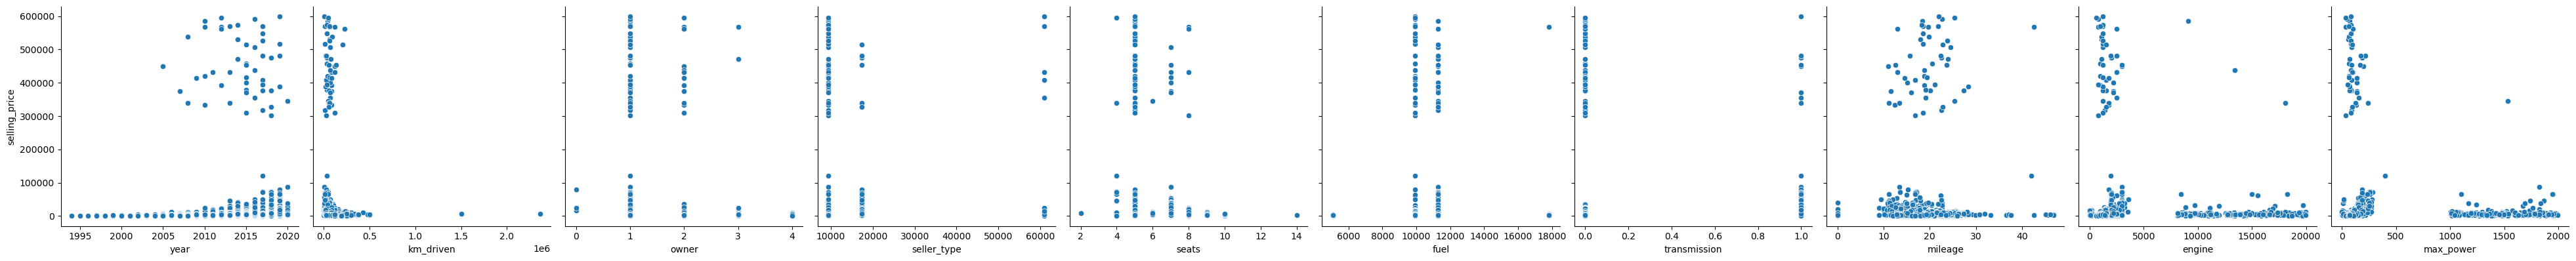

In [37]:
sns.pairplot(df_cars, height = 4, y_vars='selling_price', x_vars=num_features, kind = 'scatter')

Teniamos la duda de que si un carro es de 'Test Drive Car' debería tener muchos kilómetros puesto que es el que usan para dar una muestra de manejo a los clientes en los concesionarios. Esto haría que en nuestra transformación un 'Test Drive Car' no debería ser 0 porque eso indicaría que está nuevo cuando el carro en realidad ha sido recorrido muchos kilómetros. En este caso '0' representa a los carros 'Test Drive Car', y como vemos tienen muy poco kilometraje, por lo que equivale a que están prácticamente nuevos (0 dueños), y entonces concluimos que hicimos bien la transformación de esta variable categórica.

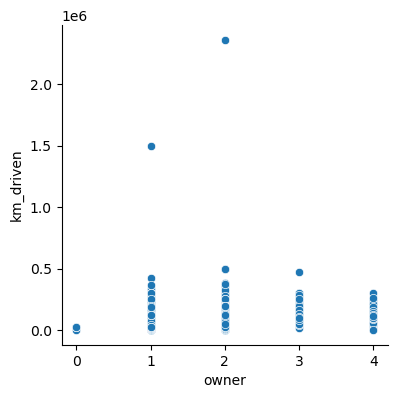

In [38]:
sns.pairplot(df_cars, height = 4, y_vars='km_driven', x_vars='owner', kind = 'scatter')

A continuación mostramos la correlación que existe entre las distintas variables.

<AxesSubplot:>

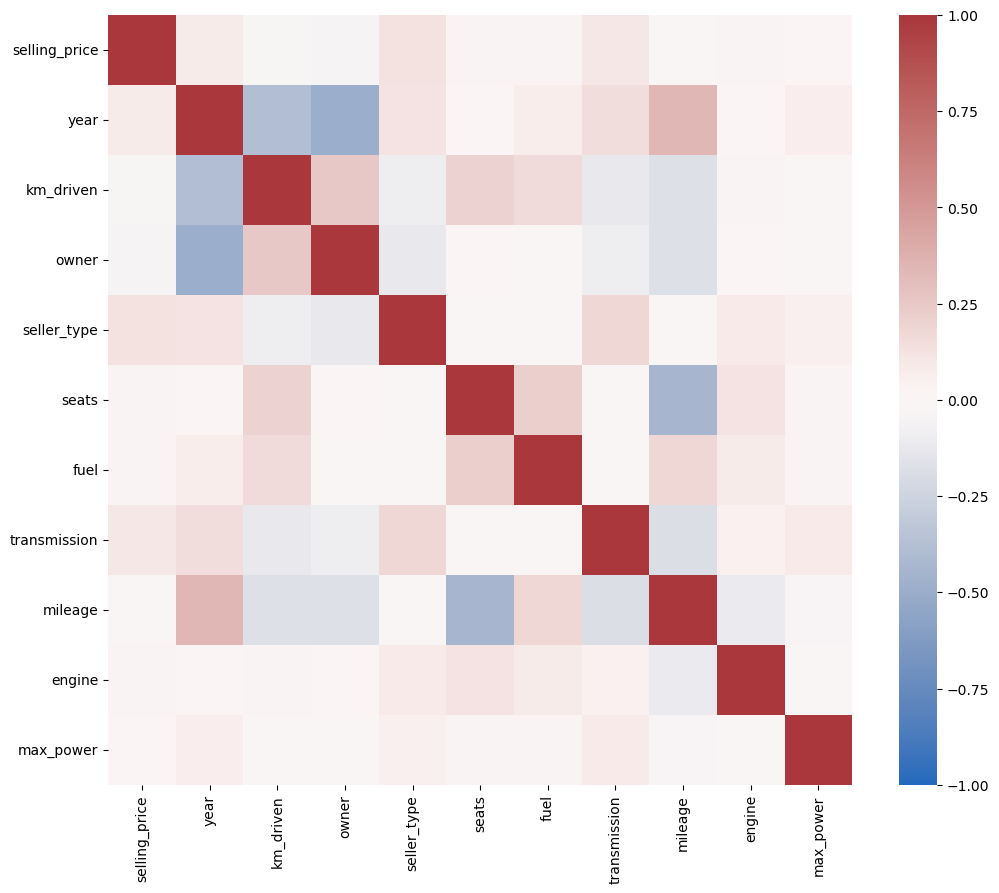

In [39]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_cars[['selling_price']+num_features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

## 3. **Modelamiento**
* * *
Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos desconocidos.Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.
### **3.1 Particionamiento del conjunto de datos en entrenamiento y prueba**
A continuación se ejecuta el comando que separa los datos con las proporciones especificadas anteriormente.


*   X_train tiene el 70% de los datos de entrenamiento para el modelo con las columnas que definen el 'selling_price'
*   y_train tiene el 70% de los datos de entrenamiento con sólo la columna 'selling_price'
*   X_test tiene el 30% de los datos de prue para el modelo con las columnas que definen el 'selling_price'
*   y_train tiene el 70% de los datos de entrenamiento con sólo la columna 'selling_price'



In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_cars[num_features], df_cars['selling_price'], test_size = 0.3, random_state = 1)

In [41]:
X_train.shape, y_train.shape

((3749, 10), (3749,))

In [42]:
X_test.shape, y_test.shape

((1608, 10), (1608,))

### **3.2 Entrenamiento de un primer modelo**

Implementar la regresion lineal (se usa polinomial features de dos grados). Para evaluar inicialmente que tan bueno es el modelo se usa r2_score y se grafican las predicciones de los precios contra los precios reales. Dado que el r2_score es demasiado bajo (se desea que sea superior al 0.7) se determina que este modelo no es adecuado.

In [43]:
second_order = PolynomialFeatures(2)
train_order_2 = second_order.fit_transform(X_train)
lr_2 = LinearRegression()
lr_2.fit(train_order_2, y_train)
test_order_2 = second_order.fit_transform(X_test)
y_hat_2 = lr_2.predict(test_order_2)
r2_score(y_test,y_hat_2)

-0.024312952441034152

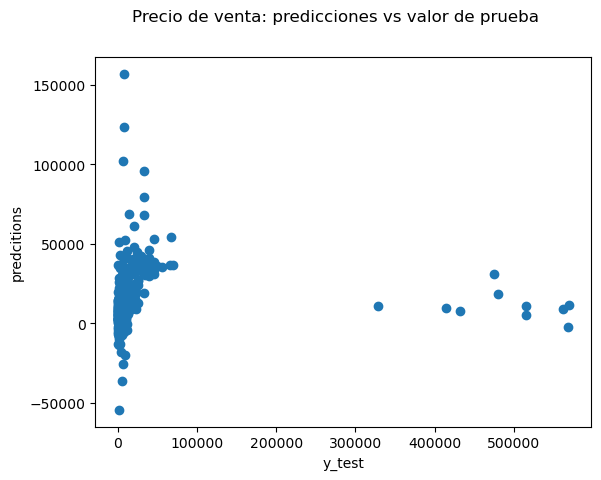

In [44]:
fig = plt.figure()
fig.suptitle('Precio de venta: predicciones vs valor de prueba')
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,y_hat_2)

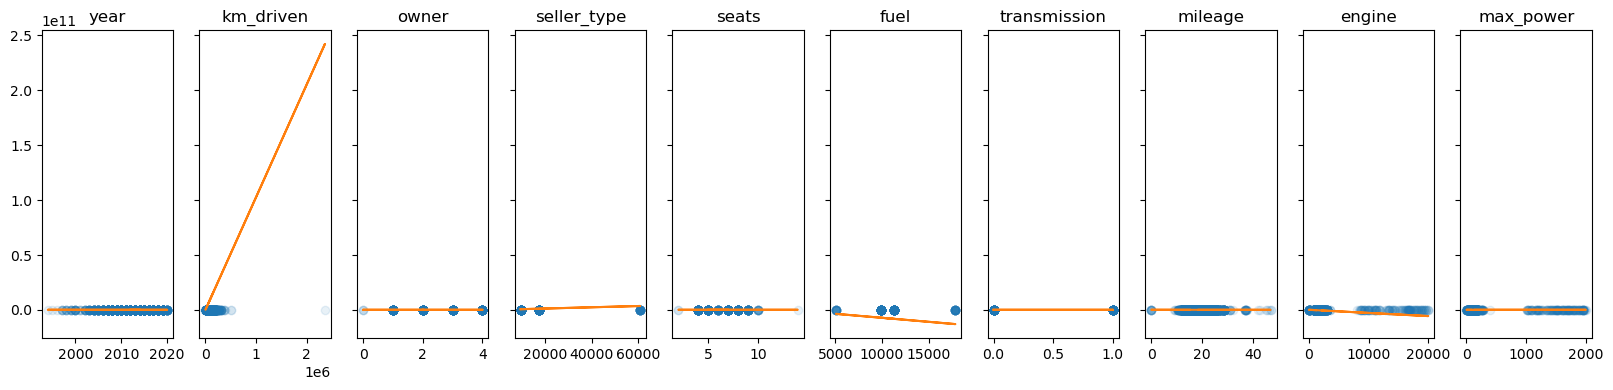

In [48]:
f, axs = plt.subplots(1, len(num_features), sharey = True, figsize = (20, 4))

for i in range(len(num_features)):
    col = num_features[i]
    x = X_train[col]
    m = lr_2.coef_[i]
    b = lr_2.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Se implementa un segundo modelo pero esta vez con regresión lineal solamente

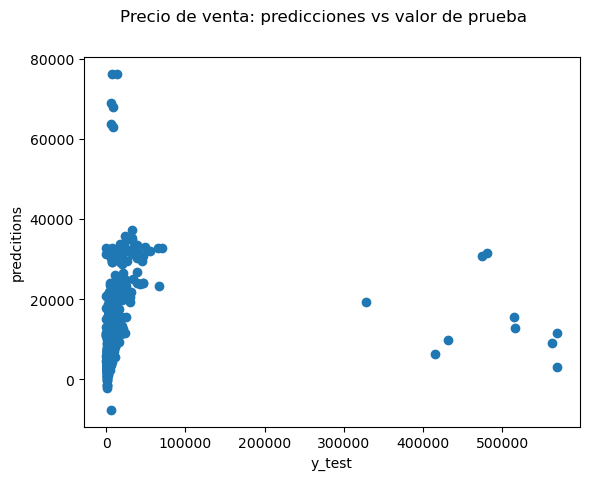

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

fig = plt.figure()
fig.suptitle('Precio de venta: predicciones vs valor de prueba')
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,y_hat)

In [51]:
r2_score(y_test,y_hat)

0.012010233482566246

### **3.3 Interpretación de los coeficientes y del intercepto**

Se desea analizar el impacto de cada característica en la predicción del precio del automovil.

In [52]:
pd.DataFrame({'columns': num_features, 'coef': lr.coef_})

columns          coef
0          year    569.171777
1     km_driven     -0.012731
2         owner   -752.391736
3   seller_type      1.030415
4         seats    698.600075
5          fuel      0.104678
6  transmission  10977.316859
7       mileage   -208.679095
8        engine      0.342261
9     max_power     -0.753075

De lo anterior se confirman las intuiciones iniciales que se tienen del problema, en general el precio de un carro es mayor entre más reciente sea el año, menos kilometros manejados tenga, menos número de dueños tenga, mayor numero de asientos y mayor capacidad del motor.

In [53]:
lr.intercept_

-1146241.1179713225

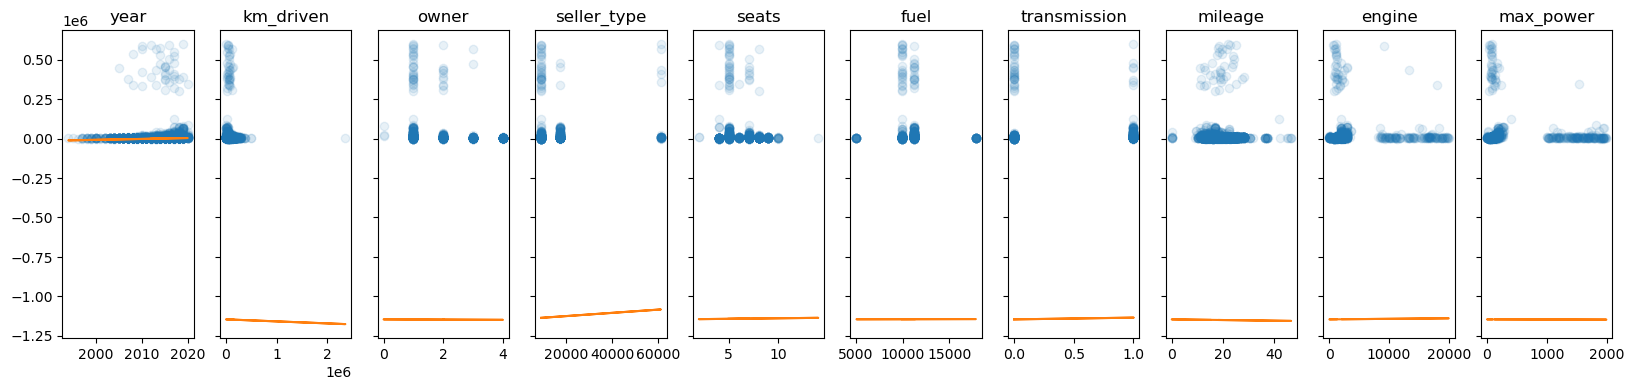

In [54]:
f, axs = plt.subplots(1, len(num_features), sharey = True, figsize = (20, 4))

for i in range(len(num_features)):
    col = num_features[i]
    x = X_train[col]
    m = lr.coef_[i]
    b = lr.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Se entrena un tercer modelo aplicando normalización.

In [55]:
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)
pipeline.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
pd.DataFrame({'columns': num_features, 'coef': pipeline['model'].coef_})

columns         coef
0          year  2242.672932
1     km_driven  -783.372696
2         owner  -544.356238
3   seller_type  5449.266475
4         seats   702.435772
5          fuel   101.392032
6  transmission  3164.828214
7       mileage  -900.143989
8        engine   839.606054
9     max_power  -216.363021

In [56]:
pipeline['model'].intercept_

11234.437626033583

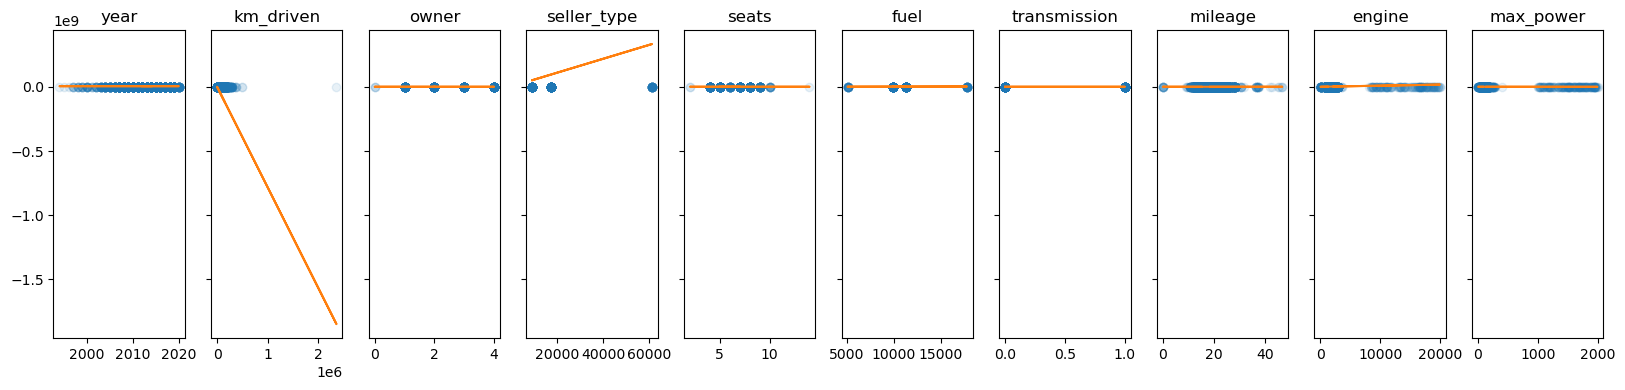

In [57]:
f, axs = plt.subplots(1, len(num_features), sharey = True, figsize = (20, 4))

for i in range(len(num_features)):
    col = num_features[i]
    x = X_train[col]
    m = pipeline['model'].coef_[i]
    b = pipeline['model'].intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [ ]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 10090.484113340217
Test: 8203.380450679166

RMSE:
Train: 45621.44722746722
Test: 38419.416022654346


In [60]:
pipeline.score(X_train,y_train)

0.029793267254326072

In [62]:
joblib.dump(lr_2, "PolinomialRegression.joblib")

['PolinomialRegression.joblib']